# DTSC-670 Final Project
## Name: Brian Beadell

## Overview

This project analyzes student data from a large Portuguese school system and develops a machine-learning model to predict academic performance based on selected features. The primary objective is to provide insights to help identify students requiring additional support and interventions to improve their grades. My approach includes utilizing a Jupyter notebook for effective communication of findings to a diverse audience, with a focus on clear organization, comprehensibility, and thorough documentation.

### Business Problem

In educational institutions, identifying and supporting students at risk of underperformance is crucial. The lack of a systematic approach to predicting academic outcomes can lead to missed opportunities for timely interventions. The business problem at hand is the need for a predictive model that utilizes student data to proactively identify individuals requiring additional support. By leveraging machine learning, the goal is to empower educators and administrators to make informed decisions, ensuring that interventions are targeted and effective in improving overall academic performance. The development of such a model addresses the broader challenge of enhancing student support systems within the educational context.

### Frame the Problem and Look at the Big Picture

I have been tasked with analyzing student data from a prominent Portuguese school system and developing a machine-learning model to predict academic performance based on selected features. The primary objective is to provide actionable insights that can assist in identifying students requiring additional support and interventions to improve their grades.

To effectively communicate my findings, I will utilize a Jupyter notebook. For clarity, the notebook will be meticulously organized with straightforward markdown comments. Clear comments in the code will facilitate comprehension and ease future revisions by team members. The project deliverables will include a comprehensive Jupyter notebook, covering the entire process from problem framing and dataset exploration to preprocessing steps, model development, and presentation of evaluation metrics. Emphasis will be placed on interpreting the model's outcomes, and the documentation will be thorough to ensure accessibility.

### Get the Data
In this section, I'm kicking off by importing the data, followed by presenting the size and structure of the dataset—a crucial step in my exploration and understanding of the data. This pivotal phase provides me with foundational insights that will guide my subsequent activities in data preprocessing, analysis, and modeling.

In [1]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing the student-mat csv and labelling it 'df'
df=pd.read_csv('student-mat.csv',na_values=["NaN"])
df.size # showing DataFrame size

13825

In [3]:
df.isna().sum() # Looking for missing values

school          0
sex             0
age            12
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_G1    14
absences_G2    14
absences_G3    14
G1              0
G2              0
G3              0
dtype: int64

In [4]:
# Looking at the DataFrame shape
df.shape

(395, 35)

In [5]:
# Looking at total instances, counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

List of available features and their data descriptions:

1. **school**: Student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex**: Student's gender ("F" - female or "M" - male)
3. **age**: Student's age (numeric: from 15 to 22)
4. **address**: Student's home address type ("U" - urban or "R" - rural)
5. **famsize**: Family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus**: Parent's cohabitation status ("T" - living together or "A" - apart)
7. **Medu**: Mother's education (numeric: 0 - none, 1 - primary education, 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
8. **Fedu**: Father's education (numeric: 0 - none, 1 - primary education, 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
9. **Mjob**: Mother's job ("teacher", "health", "services", "at_home", or "other")
10. **Fjob**: Father's job ("teacher", "health", "services", "at_home", or "other")
11. **reason**: Reason to choose this school ("home", "reputation", "course" preference, or "other")
12. **guardian**: Student's guardian ("mother", "father", or "other")
13. **traveltime**: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures**: Number of past class failures (numeric: n if 1 <= n < 3, else 4)
16. **schoolsup**: Extra educational support (binary: yes or no)
17. **famsup**: Family educational support (binary: yes or no)
18. **paid**: Extra paid classes within the course subject (binary: yes or no)
19. **activities**: Extra-curricular activities (binary: yes or no)
20. **nursery**: Attended nursery school (binary: yes or no)
21. **higher**: Wants to take higher education (binary: yes or no)
22. **internet**: Internet access at home (binary: yes or no)
23. **romantic**: In a romantic relationship (binary: yes or no)
24. **famrel**: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime**: Free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout**: Going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc**: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc**: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health**: Current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences_G1**: Number of school absences for G1 term (numeric)
31. **absences_G2**: Number of school absences for G2 term (numeric)
32. **absences_G3**: Number of school absences for G3 term (numeric)
33. **G1**: First term grade (numeric: from 0 to 20)
34. **G2**: Second term grade (numeric: from 0 to 20)
35. **G3**: Final grade (numeric: from 0 to 20)

Using the scikit-learn `train_test_split` function from the scikit-learn library I can randomly split the dataset into two subsets to train the model and test the model's performance. 

In [6]:
df_features=df.drop('G3',axis=1) # All features minus the target variable
G3_target=df['G3'] # Target variable

# Splitting the data into the traing & test sets (80% training, 20% test)
X_train,X_test,y_train,y_test=train_test_split(df_features,G3_target, test_size=.2, random_state=42)

### Explore the Data

Running the code below, I will obtain a table presenting a summary of statistics for every numerical column within the DataFrame. This summary serves as a valuable tool for me to quickly grasp the central tendency, variability, and distribution pattern of each numerical variable in the dataset.

In [7]:
#Checking the summary of numerical attributes
X_train.describe().round(2) # Rounding two decimal places

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.00,316.00,316.00,316.00,316.00,316.00,316.00,316.00,316.00,316.0,316.00,316.00,305.00,305.00,305.00,316.00,316.00
mean,16.75,2.73,2.54,1.43,2.05,0.34,3.94,3.22,3.16,1.5,2.34,3.52,0.70,0.70,4.49,10.93,10.65
std,1.27,1.08,1.08,0.69,0.84,0.74,0.89,1.02,1.12,0.9,1.30,1.41,1.37,1.37,5.82,3.22,3.76
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.0,1.00,1.00,0.00,0.00,0.00,5.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.0,1.00,3.00,0.00,0.00,0.00,8.00,9.00
50%,17.00,3.00,3.00,1.00,2.00,0.00,4.00,3.00,3.00,1.0,2.00,4.00,0.00,0.00,4.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.0,3.00,5.00,1.00,1.00,6.00,13.00,13.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.0,5.00,5.00,12.00,12.00,51.00,19.00,19.00


Below is a histogram depicting the age distribution of students in the dataset. On the x-axis, different age groups, ans the y-axis indicates the count of students in each age category. The distribution is visually represented by green bars, and a smooth curve, known as Kernel Density Estimation (KDE), is overlaid in green. This visualization is meant to give insights into the overall distribution of ages among the student population.

    age: Student's age (numeric: from 15 to 22)

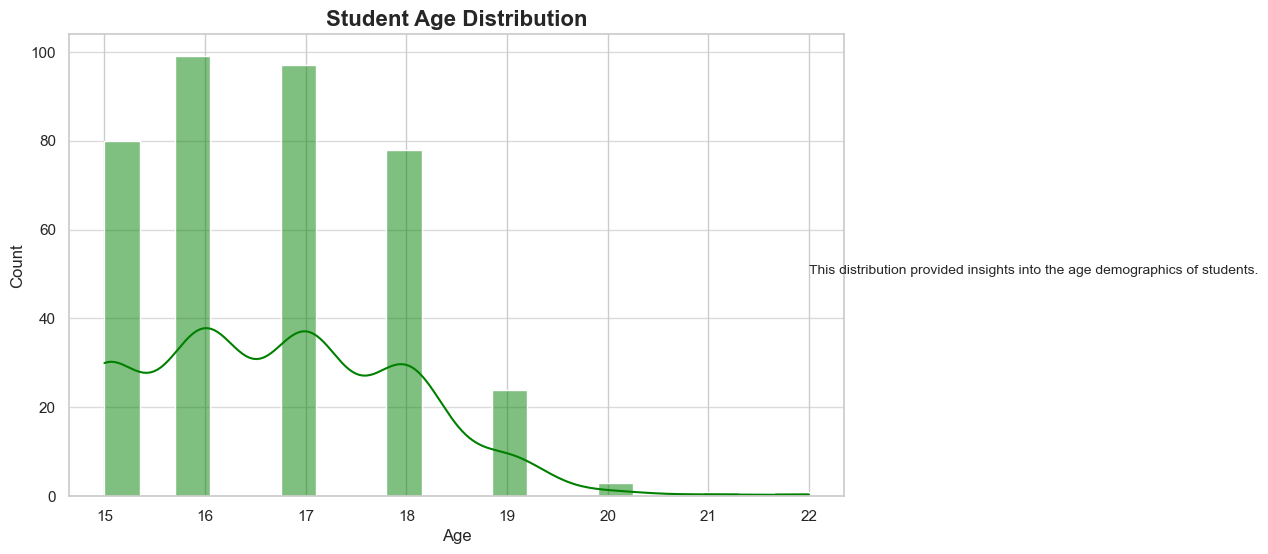

In [8]:
# Setting seaborn style for aesthetics
sns.set(style="whitegrid")

# Showed age distribution and its relevance to the analysis
plt.figure(figsize=(10, 6))  # Set figure size

# Created a histogram of the DataFrame using 'Age', with Kernel Density Estimation using the color green
sns.histplot(df['age'],kde=True,color='green',bins=20)  # Used green and set bins for better granularity

# Set title to 'Age Distribution' with a brief explanation of significance
plt.title('Student Age Distribution', fontsize=16, weight='bold')

# Created the x and y labels for clarity
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

# Provided a brief description of why analyzing age distribution is relevant
plt.text(22, 50, 'This distribution provided insights into the age demographics of students.', fontsize=10)

# Displayed grid lines for better readability
plt.grid(axis='y',alpha=0.7)

plt.show()  # Shows the plot

The correlation heatmap below is focusing on factors that significantly impact academic performance. The selected attributes include study time, past class failures, alcohol use (Dalc, Walc) and the number of school absences during the G1, G2, and G3 terms. The heatmap visually represents the strength and direction of correlations between these academic factors. I beleive this analysis is crucial for understanding the interplay of these variables and their potential influence on students' academic achievements. The numeric representation within the heatmap indicate the correlation coefficients between the factors listed. These values range from 1 to 0:
* 1 -> Perfect Positive Correlation 
    - as one variable increases, the other variable proportionately decreases.
* 0 -> No Correlation
* -1 -> Perfect Negative Correlation

There is a strong positive correlation between absences and workday alcohol consumption

There is a weak positive correlation between absences and failure rate. 

There is a strong negative correlation between absences and studytime.

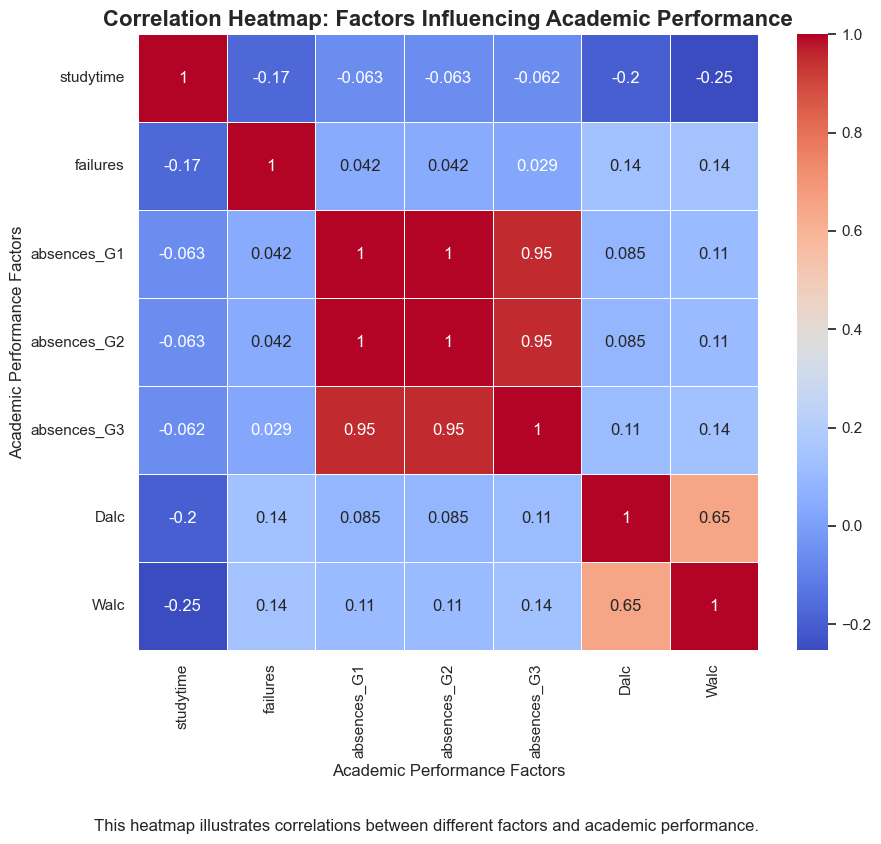

In [9]:
# Selected relevant columns for academic performance analysis
academic_performance=df[['studytime','failures','absences_G1','absences_G2','absences_G3','Dalc','Walc']]

# Created a correlation heatmap to explore factors influencing academic performance
plt.figure(figsize=(10,8))  # Setting figure size

# Used Seaborn heatmap with correlation method, annotated the correlation values, 'coolwarm' for color mapping
sns.heatmap(academic_performance.corr(),annot=True, cmap='coolwarm', linewidths=.5)

# Annotated the plot to explain the relevance of the heatmap
plt.text(-.5, 9,'This heatmap illustrates correlations between different factors and academic performance.', 
         fontsize=12,ha='left',va='center')

# Set the plot title with an explanation of the heatmap's relevance
plt.title('Correlation Heatmap: Factors Influencing Academic Performance',fontsize=16,weight='bold')

# Set the x and y labels
plt.xlabel('Academic Performance Factors',fontsize=12)
plt.ylabel('Academic Performance Factors',fontsize=12)

# Displaying the plot
plt.show()

The below visualization highlights the assessment of family relationship quality based on the type of guardian. The boxplot illustrates the distribution of family relationship ratings, providing insights into how the quality of family relationships varies among different guardian types. This analysis can be crucial for understanding potential variations in family dynamics and relationships based on the guardian's role.

    famrel: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    guardian: Student's guardian ("mother", "father", or "other")

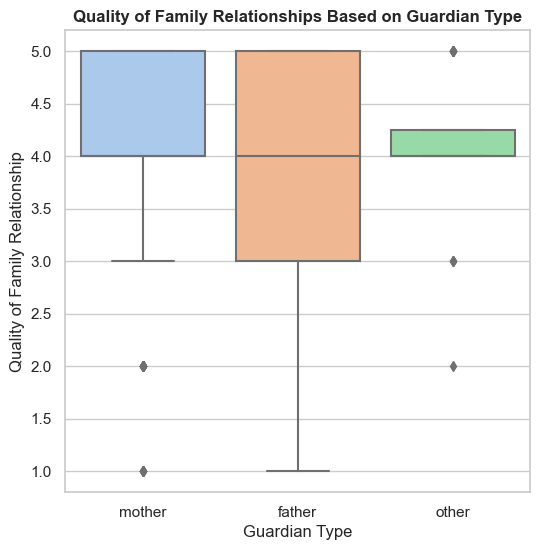

In [10]:
# Showing the quality of family relationships based on guardian type
plt.figure(figsize=(6,6)) # Setting the figure size
sns.boxplot(x='guardian',y='famrel',data=df,palette='pastel') # Setting plot x, y, using df DataFrame, palette colors
plt.title('Quality of Family Relationships Based on Guardian Type',weight='bold') # Setting plot title
plt.xlabel('Guardian Type') # Setting x label
plt.ylabel('Quality of Family Relationship') # Setting y label
plt.show() # Showing the created plot

I created the below visualization to illustrate the correlation between students' social engagement, specifically going out with friends, and their alcohol consumption on both workdays (Dalc) and weekends (Walc). The point size in the visualization is indicative of weekend alcohol consumption, while the color distinguishes various levels of alcohol consumption during the weekends. This information is valuable for understanding patterns and potential areas of concern related to students' social activities and alcohol consumption.
    
    Walc: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

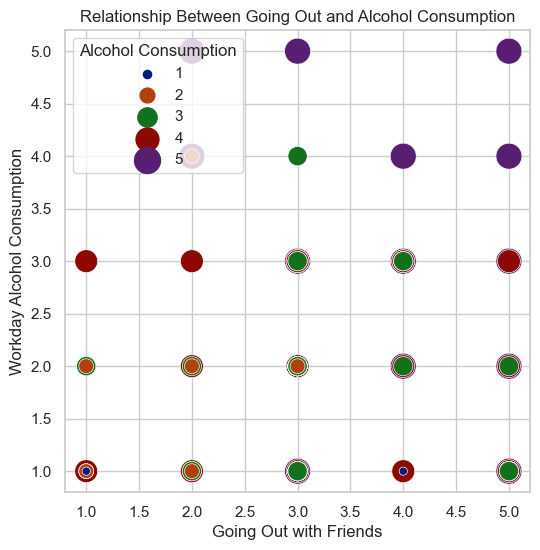

In [11]:
# Showing the relationship between going out and alcohol consumption
plt.figure(figsize=(6,6)) # Setting the figure size
# Using seaborn scatterplot; x, y, hue, data used, palette color, size, and dot sizes
sns.scatterplot(x='goout',y='Dalc',hue='Walc',data=df,palette='dark',size='Walc',sizes=(35, 350))
plt.title('Relationship Between Going Out and Alcohol Consumption') # Setting title for the plot
plt.ylabel('Workday Alcohol Consumption') # Setting the y label
plt.xlabel('Going Out with Friends') # Setting the x label
plt.legend(title='Alcohol Consumption') # Creating a legend with title
plt.show() # Show plot

I'm examining the correlation between the selected column attributes and the target variable 'G3' using the Pearson correlation coefficient.

In [12]:
# Listing column attributes 
col_attributes=['age','studytime','Dalc','Walc','absences_G1','absences_G2','absences_G3','G1','G2']

# Combining selecet columns from the training data (X_train) with the traget variable (y_train)
combined_df=pd.concat([X_train[col_attributes],y_train],axis=1)

# Calculating the correlation matrix
corr_matrix=combined_df.corr()

# Showing the correlation of selected attributes with the target variable 'G3'
corr_matrix['G3'].sort_values(ascending=False)

G3             1.000000
G2             0.907924
G1             0.791559
studytime      0.138200
absences_G3    0.092245
absences_G1    0.036652
absences_G2    0.036652
Walc          -0.057363
Dalc          -0.064698
age           -0.134519
Name: G3, dtype: float64

### Prepare the Data

I am using the code `df.isnull().sum()` to check the presence of missing values in each column of my dataset. This allows me to understand which columns have incomplete or absent information. Identifying the extent of missing data is crucial for making informed decisions on how to handle these gaps, such as filling them in or removing incomplete rows.

After running this code it became apparent to me that some data was missing in the "absences" columns-- 14 according to the returned information.

The "age" column is missing 12 values. I am going to replace those missing values with the using transformers to streamline the process.

In [13]:
# Searching for missing values
df.isnull().sum()

school          0
sex             0
age            12
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_G1    14
absences_G2    14
absences_G3    14
G1              0
G2              0
G3              0
dtype: int64

I've incorporated several data preprocessing techniques, including SimpleImputer, StandardScaler, OneHotEncoder, and OrdinalEncoder, to optimize the dataset for machine learning applications.

SimpleImputer: This technique comes in handy for handling missing values within the dataset. It seamlessly replaces any missing entries with a user-specified value or a statistical measure like the mean, median, or most frequent value. I used different "strategies" for the different attributes types.
    
     `strategy='median'` is effective for substituting NaN values in numeric data.
     `strategy='most_frequent'` is effective for substituting NaN values in nominal and binary data.

StandardScaler: I applied the StandardScaler to standardize numerical features, ensuring they have a mean of 0 and a standard deviation of 1. This normalization is crucial for certain machine-learning algorithms that are sensitive to the scale of input features.

OneHotEncoder: Specifically tailored for categorical variables, the OneHotEncoder transforms categorical data into a binary matrix. It introduces binary columns for each category, indicating the presence or absence of the category for each data point.

OrdinalEncoder: Similar to the OneHotEncoder, I used the OrdinalEncoder for the categorical data here. OrdinalEncoder is designed for ordinal categories. This feature encoder assigns unique integers to different categories based on their order.

In [14]:
# Assigning numeric attributes to 'num_attributes'
num_attributes=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2']

# Creating pipeline using SimpleImputer, StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='median')), # Making sure to target the NaN
    ('scaler', StandardScaler())
])

In [15]:
nom_attributes=['Mjob','Fjob','reason','guardian'] # Assigning nominal attributes

nom_pipeline=Pipeline([  # Creating my pipeline using SimpleImputer, OneHotEncoder
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='most_frequent')), 
    ('encoder',OneHotEncoder(drop='first'))
])

Designing the pipeline for `bin_attributes` posed a challenge, but I automated the category creation process to facilitate its construction. This step was crucial to ensure the proper functioning of the `CustomTransformer` in subsequent stages.

In [16]:
bin_attributes=['school','sex','address','famsize','activities','nursery','higher','internet','romantic']

# Automating creation of bin_categories for ease by creating a list
bin_categories=[X_train[attribute].unique().tolist() for attribute in bin_attributes]

# Creating a bin_pipeline using, OrdinalEncoder
bin_pipeline=Pipeline([
    ('encoder', OrdinalEncoder(categories=bin_categories))
])
bin_attributes

['school',
 'sex',
 'address',
 'famsize',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In creating the custom transformer, named `CustomTransformer`, I endeavored to tailor the preprocessing steps to meet the specific requirements of my dataset. Upon initialization, the transformer is endowed with the flexibility to include or exclude the 'G1' and 'G2' columns, controlled by the parameter `drop_G1_G2`. During the transformation process, I implemented two pivotal actions. Firstly, a new column, 'absences_sum,' was introduced, capturing the cumulative sum of 'absences_G1', 'absences_G2', and 'absences_G3.' Secondly, the individual absence columns were gracefully bid adieu, making room for the amalgamated 'absences_sum.' The conditional drop of the 'G1' and 'G2' columns further enhances the adaptability of this transformer, providing a tailored approach to feature selection within the preprocessing pipeline. This nuanced customization ensures that the transformer aligns with the specific nuances of my dataset, thereby optimizing its utility in the overall data preparation process.

In [17]:
class CustomTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,drop_G1_G2=False):
        self.drop_G1_G2=drop_G1_G2
    def fit(self,X,y=None):
        #self.scale_=X.std(axis=0)
        #self.n_features_in_=X.shape[1]
        return self
    def transform(self, X):
        # Creates the column 'absences_sum'
        X['absences_sum']=X[['absences_G1','absences_G2','absences_G3']].sum(axis=1)
        # Assinging the drop to X
        X=X.drop(['absences_G1','absences_G2','absences_G3'],axis=1)
        # If statement drops 'G1' and 'G2' columns when conditions are met
        if self.drop_G1_G2:
            # Assinging the drop to X
            X=X.drop(['G1','G2'], axis=1)
        #Return X
        return X

In [18]:
# Checking shape prior to ColumnTransformer (X_train).
X_train.shape

(316, 34)

In constructing the below data preprocessing pipeline, I integrated transformers tailored to specific attribute groups. The `ColumnTransformer` named `preprocessing` orchestrates the following transformations:

  - Numerical Attributes (`num`): Utilizing `num_pipeline`, I addressed missing values through median imputation and standardized numerical features with `StandardScaler`.

  - Nominal Attributes (`nom`): Employing `nom_pipeline`, I handled nominal categorical attributes by imputing missing values and applying `OneHotEncoder` for binary matrix conversion.
  
  - Binary Attributes (`bin`): Employing `bin_pipeline`, I handled the binary attributes by first automating the category assignment by creating a list. Then applying `OrdinalEncoder`.

  - Custom Transformations (`custom`): The `CustomTransformer` manages 'G1' and 'G2' column inclusion/exclusion and introduces 'absences_sum,' aggregating counts from related columns.

The resulting `X_train_prepared` is now ready for model training and evaluation.

In [19]:
# Creating the ColumnTransfor and assigning it to "preprocessing"
preprocessing=ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('nom',nom_pipeline,nom_attributes),
    ('custom',CustomTransformer(drop_G1_G2=True),['G1','G2','absences_G1','absences_G2','absences_G3'])
])

# This transforms the training dataset using the "preprocessing" pipeline created using the ColumnTransformer
X_train_prepared=preprocessing.fit_transform(X_train)
X_train_prepared # Checking the results

array([[-0.60476491,  0.24643712,  0.42320737, ...,  1.        ,
         0.        ,  2.        ],
       [-0.60476491, -0.68063585,  0.42320737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.60476491, -1.60770883,  0.42320737, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.79405154,  0.24643712,  0.42320737, ...,  0.        ,
         1.        , 15.        ],
       [ 0.19484058,  1.17351009,  0.42320737, ...,  1.        ,
         0.        ,  0.        ],
       [-1.40437039,  1.17351009,  1.35191243, ...,  1.        ,
         0.        ,  4.        ]])

In [20]:
# Checking shape after preprocessing.
X_train_prepared.shape

(316, 31)

### Shortlist Promising Models

Shortlisting promising models is a crucial step in the machine learning workflow to evaluate and select the most suitable models for a given task. This involves training a diverse set of models, evaluating their performance using appropriate metrics, and comparing the results to identify the models that show potential. The process includes considerations such as proper data preprocessing, cross-validation to ensure robust performance estimates and the selection of models based on their ability to generalize to unseen data. The goal is to narrow down the choices to a subset of models that are likely to perform well, paving the way for further optimization and final model selection.

In the process of shortlisting promising models, I employed a variety of algorithms, including Linear Regression, RandomForestRegressor, SVR (Support Vector Regression), and DecisionTreeRegressor, to fit the models to the prepared data. This diverse set of models allows for a comprehensive evaluation of different approaches to better understand their strengths and weaknesses.

Additionally, I introduced my custom transformer to investigate the impact of including or excluding the G1 and G2 columns in the dataset. This comparison provides insights into how the models perform under different feature configurations, aiding in the selection of the most suitable model for the given problem.

<u>LinearRegression</u>

In [21]:
# Instantiating the LinerRegression model and assigning to lin_reg
lin_reg=LinearRegression()

# Training the lin_reg model using X_train_prepared and y_train
lin_model=lin_reg.fit(X_train_prepared, y_train)
lin_model

LinearRegression()

In [22]:
# Making predictions on the training data
y_train_pred_linear=lin_model.predict(X_train_prepared)
y_train_pred_linear

array([ 1.28330920e+01,  1.34573759e+01,  4.26326419e+00,  8.73937824e+00,
        7.87417286e+00,  8.75249409e+00,  1.35848538e+01,  2.84775915e+00,
        1.06952951e+01,  1.62514306e+01,  1.68591487e-01,  1.49054669e+01,
        9.70636179e+00,  1.01307960e+01,  9.07286141e+00,  4.20911519e+00,
        7.28254899e+00,  8.38342883e+00,  1.87167221e+01,  1.83255361e+01,
        1.27346253e+01,  1.15448265e+01,  1.21229111e+01,  3.15705264e+00,
        9.12854520e+00,  9.39426708e+00,  4.70394414e+00,  9.92838328e+00,
        7.70489325e+00,  8.63533648e+00,  6.25707936e+00,  6.81538966e+00,
        4.35954321e+00,  9.55551349e+00,  3.16869818e+00,  8.25634912e+00,
        1.92376968e+01,  6.84344703e+00,  5.79499060e+00,  1.69806335e+01,
        1.06472104e+01,  1.17677618e+01,  9.51007898e+00,  8.38180529e+00,
        1.59134929e+01,  1.35087735e+01,  1.21567462e+01,  1.27911767e+01,
        4.58553133e+00, -2.86524033e+00,  7.35971390e+00,  1.19142938e+01,
        1.08790359e+01,  

In [23]:
# Evaluation using cross-validation
linear_cv=-cross_val_score(lin_model,X_train_prepared,y_train,scoring='neg_mean_squared_error',cv=10)
linear_cv

array([4.40311441, 3.69899358, 1.29425202, 3.06897602, 2.55866339,
       2.64747026, 3.08372267, 5.8969225 , 3.05540843, 3.52464278])

<u>RandomForestRegressor<u>

In [24]:
# Instantiate RandomForestRegressor class
forest_reg=RandomForestRegressor(random_state=42) 

# Training the forest_reg model using X_train_prepared and y_train
forest_model=forest_reg.fit(X_train_prepared,y_train)

In [25]:
# Making predictions on the training data
y_train_pred_forest=forest_model.predict(X_train_prepared)
y_train_pred_forest

array([12.46, 14.  ,  0.94,  8.9 ,  8.11,  7.58, 14.18,  0.57, 11.58,
       15.19,  0.15, 13.19,  9.25, 11.09,  9.15,  0.63,  7.99,  9.52,
       18.22, 18.8 , 13.99, 12.42, 12.45,  5.69, 10.  , 10.04,  7.9 ,
       10.  ,  7.96,  9.33,  2.94,  6.54,  5.03, 10.92,  5.28,  9.53,
       18.09,  7.47,  7.5 , 15.83, 10.12, 11.55,  8.37,  8.33, 15.8 ,
       11.69, 11.83, 12.66,  1.95,  0.2 ,  8.15, 12.06, 10.43, 12.85,
        0.18, 18.02, 15.42,  0.21, 11.03, 16.92, 12.  ,  9.86, 13.06,
       10.35, 15.76,  9.2 , 11.29, 15.01, 11.42, 10.39, 14.03,  0.08,
        7.94,  8.31,  5.96, 10.55, 10.92, 13.03,  9.89, 13.65,  9.75,
        8.  ,  6.84,  6.06, 10.84, 16.34,  6.25, 15.79, 12.4 , 15.17,
       13.52, 15.87,  9.81,  8.97,  8.46, 12.36, 15.42,  0.  , 12.97,
        6.27,  8.11,  9.88, 12.11, 11.38,  8.03, 12.38,  0.84, 11.41,
        6.42,  0.09,  9.93,  0.56, 15.19,  9.83, 13.78,  8.63,  5.23,
       11.05, 13.12,  7.93, 18.04, 11.43, 12.01,  9.87, 11.46, 12.91,
       13.07, 10.62,

In [26]:
# Evaluation using cross-validation
forest_cv=cross_val_score(forest_model,X_train_prepared,y_train,scoring='neg_mean_squared_error', cv=10)
forest_cv

array([-1.78215938, -2.34829375, -1.40005625, -0.96861562, -1.32885937,
       -1.49642813, -1.41920645, -4.46426129, -2.86932903, -1.42474839])

<u>Support Vector Machine<u>

In [27]:
# Instantiate SVR model
svm_model=SVR()

# Training the SVR model using X_train_prepared and y_train
svm_model.fit(X_train_prepared,y_train)

SVR()

In [28]:
# Making predictions on the training data
y_train_pred=svm_model.predict(X_train_prepared)
y_train_pred

array([12.80192096, 12.98233853,  6.09255683,  9.53905569,  8.46310211,
        9.51945508, 13.12519245,  5.47493577, 11.7539222 , 13.7311076 ,
        4.97257451, 11.15425387,  9.86020449, 11.26698746, 10.06451318,
        7.00741016,  9.29351536, 10.0904674 , 16.08705783, 16.6051846 ,
       13.79996002, 12.10005071, 10.93237737,  7.34353049,  9.91460561,
       10.65035187,  7.90010334,  9.99068751,  9.39384366, 10.57910697,
        8.86507881,  7.56827395,  8.08574018, 10.97331147,  7.86356632,
        9.90024941, 16.49590161,  6.61205493,  7.55012725, 14.63791328,
       10.09799398, 10.74974631, 10.04811285,  9.60512309, 14.57328765,
       12.45159181, 12.1109295 , 12.52723958,  6.95786602,  2.96608625,
        8.81037618, 12.64411267, 11.49029943, 13.46563158,  5.56639419,
       11.61985004, 14.89965363,  7.10567496, 11.17692271, 15.50564604,
       12.7906875 , 10.22974704, 10.72317841, 10.42944536, 15.2402803 ,
        8.81124031, 11.06855054, 12.91888835, 11.46417559,  9.98

In [29]:
# Evaluation using cross-validation
svm_cv=cross_val_score(svm_model, X_train_prepared, y_train, scoring='neg_mean_squared_error',cv=10)
svm_cv

array([-10.00547077,  -8.60901827,  -3.54450777,  -6.24455762,
        -4.06809056,  -7.29399309,  -7.46704322,  -9.2503884 ,
        -5.56775877,  -5.30872456])

<u>DecisionTreeRegressor<u>

In [30]:
# Instantiate DecisionTreeRegressor model
tree_model=DecisionTreeRegressor(random_state=42)

# Training the DecisionTreeRegressor model using X_train_prepared and y_train
tree_model.fit(X_train_prepared,y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
# Make predictions on the training data
y_train_pred=tree_model.predict(X_train_prepared)
y_train_pred

array([12., 14.,  0.,  9.,  8.,  7., 14.,  0., 12., 15.,  0., 13.,  9.,
       11., 10.,  0.,  8., 10., 18., 19., 14., 12., 13.,  6., 10., 10.,
        8., 10.,  8.,  9.,  0.,  7.,  5., 11.,  5., 10., 18.,  8.,  8.,
       16., 10., 12.,  8., 11., 16., 11., 12., 13.,  0.,  0.,  8., 12.,
       10., 13.,  0., 18., 15.,  0., 11., 18., 12., 10., 13., 10., 16.,
       10., 11., 15., 11., 11., 14.,  0.,  9.,  8.,  6., 11., 11., 13.,
       10., 14., 10.,  8.,  7.,  6., 11., 17.,  6., 16., 13., 15., 13.,
       16., 10.,  9.,  8., 12., 15.,  0., 13.,  6.,  8., 10., 12., 11.,
        8., 12.,  0., 12.,  6.,  0., 10.,  0., 15., 10., 14.,  8.,  6.,
       11., 13.,  8., 18., 11., 12., 10., 11., 13., 13., 11., 17.,  9.,
       13., 15.,  9., 10., 10., 11.,  7.,  8.,  0., 12., 10., 10.,  0.,
       10., 11., 16.,  9., 11., 11., 15., 14., 14., 12., 17., 13., 11.,
        9., 11., 10., 11., 15., 16., 18.,  9.,  0., 11.,  0., 12., 19.,
        9., 10., 15., 13.,  8.,  0., 11., 15., 12., 14.,  6., 11

In [32]:
# Evaluation using cross-validation
tree_cv=-cross_val_score(tree_model,X_train_prepared,y_train,scoring='neg_mean_squared_error',cv=10)
tree_cv

array([4.25      , 6.96875   , 1.84375   , 2.        , 2.03125   ,
       2.34375   , 1.25806452, 4.61290323, 4.32258065, 3.64516129])

I have employed `ColumnTransformer` to combine various transformers for preprocessing data. This includes the numerical pipeline (`num_pipeline`), the nominal pipeline (`nom_pipeline`), and the custom transformer (`CustomTransformer`). The custom transformer is configured with the parameter `drop_G1_G2` set to `False`, indicating that the 'G1' and 'G2' columns will be retained in the data. The specified columns are then transformed using the defined transformers, creating a comprehensive preprocessing pipeline for the machine-learning models used.

In [33]:
# Combined transformers using ColumnTransformer with the custom transformer
preprocessing_with_G1_G2=ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('nom',nom_pipeline,nom_attributes),
    ('custom',CustomTransformer(drop_G1_G2=False),['G1','G2','absences_G1','absences_G2','absences_G3'])
])

This code applies the preprocessing pipeline to the training data.

In [81]:
# Applying the preprocessing pipeline
X_train_prepared_with_G1_G2=preprocessing_with_G1_G2.fit_transform(X_train)
X_train_prepared_with_G1_G2

array([[-0.60476491,  0.24643712,  0.42320737, ..., 12.        ,
        13.        ,  2.        ],
       [-0.60476491, -0.68063585,  0.42320737, ..., 13.        ,
        14.        ,  0.        ],
       [-0.60476491, -1.60770883,  0.42320737, ...,  8.        ,
         7.        ,  0.        ],
       ...,
       [ 1.79405154,  0.24643712,  0.42320737, ...,  9.        ,
         9.        , 15.        ],
       [ 0.19484058,  1.17351009,  0.42320737, ..., 13.        ,
        15.        ,  0.        ],
       [-1.40437039,  1.17351009,  1.35191243, ..., 10.        ,
        13.        ,  4.        ]])

Comparing Four Models **With** 'G1' and 'G2' Columns


<u>LinearRegression Model<u>

In [35]:
# Linear Regression
# Training the Linear Regression model using the preprocessed data (X_train_prepared_with_G1_G2) with 'G1' and 'G2' columns included, and target labels (y_train).
lin_model_with_G1_G2=LinearRegression()
lin_model_with_G1_G2.fit(X_train_prepared_with_G1_G2,y_train)

LinearRegression()

In [36]:
# Generating the predictions with 'G1' and 'G2' columns using my trained Linear Regression model (lin_model_with_G1_G2).
y_train_pred_linear_with_G1_G2=lin_model_with_G1_G2.predict(X_train_prepared_with_G1_G2)

In [37]:
# Running a cross-validation score for my LinearRegression model with 'G1' and 'G2' columns included
linear_cv_with_G1_G2=-cross_val_score(lin_model_with_G1_G2,X_train_prepared_with_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
linear_cv_with_G1_G2.mean() # Shows the cross-validation mean score 

3.3232166059282973

In [38]:
# This displays the statistics for the linear_cv_with_G1_G2 data
pd.Series(linear_cv_with_G1_G2).describe()

count    10.000000
mean      3.323217
std       1.216713
min       1.294252
25%       2.749455
50%       3.076349
75%       3.655406
max       5.896923
dtype: float64

<u>RandomForestRegressor</u>

In [39]:
# Training the RandomForestRegressor model with 'G1' and 'G2' columns included
forest_model_with_G1_G2=RandomForestRegressor(random_state=42)
forest_model_with_G1_G2.fit(X_train_prepared_with_G1_G2, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Making predictions on the training data
forest_y_train_pred_with_G1_G2=forest_model_with_G1_G2.predict(X_train_prepared_with_G1_G2)
forest_y_train_pred_with_G1_G2

array([12.44, 13.99,  0.84,  9.  ,  8.24,  7.59, 14.15,  0.42, 11.58,
       15.17,  0.15, 13.13,  9.31, 11.18,  8.97,  0.59,  7.96,  9.54,
       18.19, 18.9 , 13.99, 12.38, 12.49,  5.67, 10.08, 10.17,  7.88,
        9.91,  7.91,  9.37,  2.95,  6.57,  5.1 , 10.98,  5.24,  9.46,
       18.09,  7.61,  7.44, 15.79, 10.1 , 11.55,  8.42,  8.51, 15.82,
       11.7 , 11.84, 12.64,  1.71,  0.16,  8.16, 12.  , 10.38, 12.92,
        0.18, 18.02, 15.34,  0.35, 11.03, 16.87, 12.01,  9.91, 12.99,
       10.3 , 15.77,  9.35, 11.28, 15.01, 11.34, 10.43, 14.04,  0.08,
        8.04,  8.34,  5.94, 10.51, 10.86, 12.98,  9.87, 13.64,  9.85,
        8.1 ,  6.82,  6.08, 10.92, 16.36,  6.27, 15.78, 12.37, 15.18,
       13.49, 15.74,  9.82,  8.97,  8.51, 12.41, 15.37,  0.  , 12.99,
        6.24,  8.11,  9.91, 12.1 , 11.37,  8.09, 12.38,  0.63, 11.43,
        6.4 ,  0.09,  9.87,  0.73, 15.15,  9.96, 13.78,  8.63,  5.15,
       11.06, 13.08,  7.9 , 18.01, 11.39, 12.03,  9.89, 11.44, 12.96,
       13.09, 10.6 ,

In [41]:
# Evaluating the RandomForest model with 'G1' and 'G2' columns included using mean squared error
forest_mse_train_with_G1_G2=mean_squared_error(y_train,forest_y_train_pred_with_G1_G2)
forest_mse_train_with_G1_G2 # Shows the Mean Squared Error score

0.31817151898734175

In [42]:
# Evaluating the RandomForest model with cross-validation
forest_cv_with_G1_G2=-cross_val_score(forest_model_with_G1_G2,X_train_prepared_with_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
forest_cv_with_G1_G2.mean() # Shows the cross-validation mean score

1.9019063004032255

In [43]:
# Displaying stats
pd.Series(forest_cv_with_G1_G2).describe()

count    10.000000
mean      1.901906
std       0.993778
min       1.107031
25%       1.326415
50%       1.460338
75%       2.125256
max       4.355303
dtype: float64

<u>Support Vector Machine</u>


In [44]:
# Training the Support Vector Machine Model with 'G1' and 'G2' columns included
svm_model_with_G1_G2=SVR()
svm_y_train_pred_with_G1_G2=svm_model_with_G1_G2.fit(X_train_prepared_with_G1_G2, y_train)
svm_y_train_pred_with_G1_G2 

SVR()

In [45]:
# Making predictions on the training data
svm_y_train_pred_with_G1_G2=svm_model_with_G1_G2.predict(X_train_prepared_with_G1_G2).round(2) # Rounding 2 decimal places
svm_y_train_pred_with_G1_G2 # Showing the predictions

array([13.19, 13.94,  5.89,  8.72,  8.21,  8.63, 14.1 ,  4.3 , 11.2 ,
       15.26,  1.53, 11.91,  9.03, 11.1 ,  9.74,  5.47,  8.1 ,  9.14,
       17.03, 17.  , 14.23, 12.64, 12.13,  5.29,  9.65, 10.65,  6.97,
        9.78,  8.18,  9.79,  8.25,  5.93,  6.12, 10.77,  5.69,  9.57,
       17.36,  6.85,  6.43, 15.38,  9.79, 11.23,  8.86,  9.33, 15.64,
       13.05, 12.4 , 12.46,  6.11,  1.19,  7.59, 12.5 , 11.17, 13.57,
        4.39, 14.  , 15.71,  5.37, 10.91, 16.15, 12.64,  9.96, 12.32,
       10.58, 16.1 ,  9.1 , 11.61, 14.4 , 11.96,  9.14, 14.37,  4.15,
        7.65,  8.09,  7.89, 10.45, 11.63, 12.93,  8.85, 13.59,  9.57,
        8.49,  7.34,  7.24, 10.9 , 15.73,  5.83, 15.74, 11.5 , 14.42,
       13.92, 14.88,  8.57,  9.55,  8.6 , 13.04, 15.78,  1.4 , 13.18,
        6.88,  8.33,  9.09, 12.21, 12.5 ,  8.85, 12.77,  5.79, 10.79,
        6.87,  1.32,  9.83,  7.24, 14.69,  9.72, 13.37,  9.67,  5.54,
       11.03, 13.35,  8.18, 16.83, 12.21, 12.13,  8.81, 12.25, 13.45,
       12.72, 10.28,

In [46]:
# Evaluating the SVM model with 'G1' and 'G2' columns with cross-validation
svm_cv_with_G1_G2=-cross_val_score(svm_model_with_G1_G2,X_train_prepared_with_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
svm_cv_with_G1_G2 # Viewing the five cross-validation scores this time

array([5.87608136, 4.55424901, 1.55616197, 4.01973991, 1.89125646,
       4.41313104, 3.39825209, 7.26709766, 3.63848188, 3.33948026])

In [47]:
# Displaying stats
pd.Series(svm_cv_with_G1_G2).describe()

count    10.000000
mean      3.995393
std       1.700323
min       1.556162
25%       3.354173
50%       3.829111
75%       4.518970
max       7.267098
dtype: float64

<u>DecisionTreeRegressor<u>

In [48]:
# Training the DecisionTree model with 'G1' and 'G2' columns included
tree_model_with_G1_G2=DecisionTreeRegressor(random_state=42) 
tree_model_with_G1_G2.fit(X_train_prepared_with_G1_G2, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
# Making predictions on the training data
tree_y_train_pred_with_G1_G2=tree_model_with_G1_G2.predict(X_train_prepared_with_G1_G2)
tree_y_train_pred_with_G1_G2 # Showing predictions

array([12., 14.,  0.,  9.,  8.,  7., 14.,  0., 12., 15.,  0., 13.,  9.,
       11., 10.,  0.,  8., 10., 18., 19., 14., 12., 13.,  6., 10., 10.,
        8., 10.,  8.,  9.,  0.,  7.,  5., 11.,  5., 10., 18.,  8.,  8.,
       16., 10., 12.,  8., 11., 16., 11., 12., 13.,  0.,  0.,  8., 12.,
       10., 13.,  0., 18., 15.,  0., 11., 18., 12., 10., 13., 10., 16.,
       10., 11., 15., 11., 11., 14.,  0.,  9.,  8.,  6., 11., 11., 13.,
       10., 14., 10.,  8.,  7.,  6., 11., 17.,  6., 16., 13., 15., 13.,
       16., 10.,  9.,  8., 12., 15.,  0., 13.,  6.,  8., 10., 12., 11.,
        8., 12.,  0., 12.,  6.,  0., 10.,  0., 15., 10., 14.,  8.,  6.,
       11., 13.,  8., 18., 11., 12., 10., 11., 13., 13., 11., 17.,  9.,
       13., 15.,  9., 10., 10., 11.,  7.,  8.,  0., 12., 10., 10.,  0.,
       10., 11., 16.,  9., 11., 11., 15., 14., 14., 12., 17., 13., 11.,
        9., 11., 10., 11., 15., 16., 18.,  9.,  0., 11.,  0., 12., 19.,
        9., 10., 15., 13.,  8.,  0., 11., 15., 12., 14.,  6., 11

In [50]:
# Evaluating the DecisionTree model with 'G1' and 'G2' columns with cross-validation
tree_cv_with_G1_G2=-cross_val_score(tree_model_with_G1_G2,X_train_prepared_with_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
tree_cv_with_G1_G2 # Again, showing the five cross-validation scores

array([3.59375   , 6.96875   , 1.53125   , 6.34375   , 1.84375   ,
       1.9375    , 1.58064516, 4.77419355, 4.09677419, 3.61290323])

In [51]:
# Displaying stats
pd.Series(tree_cv_with_G1_G2).describe()

count    10.000000
mean      3.628327
std       1.963562
min       1.531250
25%       1.867188
50%       3.603327
75%       4.604839
max       6.968750
dtype: float64

Comparing Four Models **Without** 'G1' and 'G2' Columns

In [52]:
# Combining the transformers using ColumnTransformer with the CustomTransformer
preprocessing_without_G1_G2=ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('nom',nom_pipeline,nom_attributes),
    ('custom',CustomTransformer(drop_G1_G2=False),['G1','G2','absences_G1','absences_G2','absences_G3'])
])

This code (below) applies the preprocessing pipeline, dropping columns 'G1' and 'G2,to the training data.

In [53]:
X_train_prepared_without_G1_G2=preprocessing_without_G1_G2.fit_transform(X_train)
X_train_prepared_without_G1_G2

array([[-0.60476491,  0.24643712,  0.42320737, ..., 12.        ,
        13.        ,  2.        ],
       [-0.60476491, -0.68063585,  0.42320737, ..., 13.        ,
        14.        ,  0.        ],
       [-0.60476491, -1.60770883,  0.42320737, ...,  8.        ,
         7.        ,  0.        ],
       ...,
       [ 1.79405154,  0.24643712,  0.42320737, ...,  9.        ,
         9.        , 15.        ],
       [ 0.19484058,  1.17351009,  0.42320737, ..., 13.        ,
        15.        ,  0.        ],
       [-1.40437039,  1.17351009,  1.35191243, ..., 10.        ,
        13.        ,  4.        ]])

LinearRegression

In [54]:
# Training the model and evaluate performance without 'G1' and 'G2' columns
linear_model_without_G1_G2=LinearRegression()
linear_model_without_G1_G2.fit(X_train_prepared_without_G1_G2,y_train)

LinearRegression()

In [55]:
# Making the predictions on the training data
linear_y_train_pred_without_G1_G2=linear_model_without_G1_G2.predict(X_train_prepared_without_G1_G2)
linear_y_train_pred_without_G1_G2 # Showing the predictions

array([ 1.28330920e+01,  1.34573759e+01,  4.26326419e+00,  8.73937824e+00,
        7.87417286e+00,  8.75249409e+00,  1.35848538e+01,  2.84775915e+00,
        1.06952951e+01,  1.62514306e+01,  1.68591487e-01,  1.49054669e+01,
        9.70636179e+00,  1.01307960e+01,  9.07286141e+00,  4.20911519e+00,
        7.28254899e+00,  8.38342883e+00,  1.87167221e+01,  1.83255361e+01,
        1.27346253e+01,  1.15448265e+01,  1.21229111e+01,  3.15705264e+00,
        9.12854520e+00,  9.39426708e+00,  4.70394414e+00,  9.92838328e+00,
        7.70489325e+00,  8.63533648e+00,  6.25707936e+00,  6.81538966e+00,
        4.35954321e+00,  9.55551349e+00,  3.16869818e+00,  8.25634912e+00,
        1.92376968e+01,  6.84344703e+00,  5.79499060e+00,  1.69806335e+01,
        1.06472104e+01,  1.17677618e+01,  9.51007898e+00,  8.38180529e+00,
        1.59134929e+01,  1.35087735e+01,  1.21567462e+01,  1.27911767e+01,
        4.58553133e+00, -2.86524033e+00,  7.35971390e+00,  1.19142938e+01,
        1.08790359e+01,  

In [56]:
linear_cv_without_G1_G2=-cross_val_score(linear_model_without_G1_G2,X_train_prepared_without_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
linear_cv_without_G1_G2 # Showing the cv score

array([4.40311441, 3.69899358, 1.29425202, 3.06897602, 2.55866339,
       2.64747026, 3.08372267, 5.8969225 , 3.05540843, 3.52464278])

In [57]:
pd.Series(linear_cv_without_G1_G2).describe()

count    10.000000
mean      3.323217
std       1.216713
min       1.294252
25%       2.749455
50%       3.076349
75%       3.655406
max       5.896923
dtype: float64

<u>RandForestRegressor<u>

In [58]:
# Training the model and evaluate performance without 'G1' and 'G2' columns
forest_model_without_G1_G2 = RandomForestRegressor(random_state=42)
forest_model_without_G1_G2.fit(X_train_prepared_without_G1_G2, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Making the predictions on the training data
forest_y_train_pred_without_G1_G2=forest_model_without_G1_G2.predict(X_train_prepared_without_G1_G2)
forest_y_train_pred_without_G1_G2 

array([12.44, 13.99,  0.84,  9.  ,  8.24,  7.59, 14.15,  0.42, 11.58,
       15.17,  0.15, 13.13,  9.31, 11.18,  8.97,  0.59,  7.96,  9.54,
       18.19, 18.9 , 13.99, 12.38, 12.49,  5.67, 10.08, 10.17,  7.88,
        9.91,  7.91,  9.37,  2.95,  6.57,  5.1 , 10.98,  5.24,  9.46,
       18.09,  7.61,  7.44, 15.79, 10.1 , 11.55,  8.42,  8.51, 15.82,
       11.7 , 11.84, 12.64,  1.71,  0.16,  8.16, 12.  , 10.38, 12.92,
        0.18, 18.02, 15.34,  0.35, 11.03, 16.87, 12.01,  9.91, 12.99,
       10.3 , 15.77,  9.35, 11.28, 15.01, 11.34, 10.43, 14.04,  0.08,
        8.04,  8.34,  5.94, 10.51, 10.86, 12.98,  9.87, 13.64,  9.85,
        8.1 ,  6.82,  6.08, 10.92, 16.36,  6.27, 15.78, 12.37, 15.18,
       13.49, 15.74,  9.82,  8.97,  8.51, 12.41, 15.37,  0.  , 12.99,
        6.24,  8.11,  9.91, 12.1 , 11.37,  8.09, 12.38,  0.63, 11.43,
        6.4 ,  0.09,  9.87,  0.73, 15.15,  9.96, 13.78,  8.63,  5.15,
       11.06, 13.08,  7.9 , 18.01, 11.39, 12.03,  9.89, 11.44, 12.96,
       13.09, 10.6 ,

In [60]:
forest_cv_without_G1_G2=-cross_val_score(forest_model_without_G1_G2, X_train_prepared_without_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
forest_cv_without_G1_G2.mean() # Showing cv mean

1.9019063004032255

In [61]:
pd.Series(forest_cv_without_G1_G2).describe()

count    10.000000
mean      1.901906
std       0.993778
min       1.107031
25%       1.326415
50%       1.460338
75%       2.125256
max       4.355303
dtype: float64

Support Vector Machine

In [62]:
# Training the model and evaluate performance without 'G1' and 'G2' columns
svm_model_without_G1_G2=SVR()
svm_model_without_G1_G2.fit(X_train_prepared_without_G1_G2,y_train)

SVR()

In [63]:
# Making the predictions on the training data
svm_y_train_pred_without_G1_G2=svm_model_without_G1_G2.predict(X_train_prepared_without_G1_G2)
svm_y_train_pred_without_G1_G2

array([13.18591324, 13.93596146,  5.89181841,  8.7225737 ,  8.20583581,
        8.62707237, 14.10013152,  4.30362539, 11.19590257, 15.26405606,
        1.53446543, 11.90612522,  9.03454659, 11.10004139,  9.73771591,
        5.47223638,  8.10024938,  9.14208881, 17.02570207, 16.99516542,
       14.2322166 , 12.63956665, 12.12654533,  5.29201772,  9.64819334,
       10.64863414,  6.96517269,  9.77549798,  8.17676088,  9.7873567 ,
        8.25012689,  5.92931283,  6.11818104, 10.76782761,  5.68980722,
        9.56684892, 17.35635037,  6.8519315 ,  6.43092135, 15.38477709,
        9.79200313, 11.22643582,  8.85736741,  9.33149825, 15.64037198,
       13.05378078, 12.40044783, 12.45934389,  6.10752295,  1.1852065 ,
        7.5864175 , 12.49894465, 11.17439787, 13.56604407,  4.3892601 ,
       14.00368663, 15.70935954,  5.36639648, 10.90968364, 16.15019391,
       12.64209472,  9.95784238, 12.31991819, 10.58330385, 16.09964914,
        9.10393614, 11.61496493, 14.40430094, 11.96242216,  9.13

In [64]:
# Evaluating the model with 'G1' and 'G2' columns with cross-validation
svm_cv_without_G1_G2=-cross_val_score(svm_model_without_G1_G2,X_train_prepared_without_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
svm_cv_without_G1_G2

array([5.87608136, 4.55424901, 1.55616197, 4.01973991, 1.89125646,
       4.41313104, 3.39825209, 7.26709766, 3.63848188, 3.33948026])

In [65]:
# Displaying the stats
pd.Series(svm_cv_without_G1_G2).describe()

count    10.000000
mean      3.995393
std       1.700323
min       1.556162
25%       3.354173
50%       3.829111
75%       4.518970
max       7.267098
dtype: float64

DecisionTreeRegressor

In [66]:
# Training the model and evaluate performance without 'G1' and 'G2' columns
tree_model_without_G1_G2=DecisionTreeRegressor(random_state=42)
tree_model_without_G1_G2.fit(X_train_prepared_without_G1_G2,y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
# Making the predictions on the training data
tree_y_train_pred_without_G1_G2=tree_model_without_G1_G2.predict(X_train_prepared_without_G1_G2)
tree_y_train_pred_without_G1_G2

array([12., 14.,  0.,  9.,  8.,  7., 14.,  0., 12., 15.,  0., 13.,  9.,
       11., 10.,  0.,  8., 10., 18., 19., 14., 12., 13.,  6., 10., 10.,
        8., 10.,  8.,  9.,  0.,  7.,  5., 11.,  5., 10., 18.,  8.,  8.,
       16., 10., 12.,  8., 11., 16., 11., 12., 13.,  0.,  0.,  8., 12.,
       10., 13.,  0., 18., 15.,  0., 11., 18., 12., 10., 13., 10., 16.,
       10., 11., 15., 11., 11., 14.,  0.,  9.,  8.,  6., 11., 11., 13.,
       10., 14., 10.,  8.,  7.,  6., 11., 17.,  6., 16., 13., 15., 13.,
       16., 10.,  9.,  8., 12., 15.,  0., 13.,  6.,  8., 10., 12., 11.,
        8., 12.,  0., 12.,  6.,  0., 10.,  0., 15., 10., 14.,  8.,  6.,
       11., 13.,  8., 18., 11., 12., 10., 11., 13., 13., 11., 17.,  9.,
       13., 15.,  9., 10., 10., 11.,  7.,  8.,  0., 12., 10., 10.,  0.,
       10., 11., 16.,  9., 11., 11., 15., 14., 14., 12., 17., 13., 11.,
        9., 11., 10., 11., 15., 16., 18.,  9.,  0., 11.,  0., 12., 19.,
        9., 10., 15., 13.,  8.,  0., 11., 15., 12., 14.,  6., 11

In [68]:
# Evaluating the model with 'G1' and 'G2' columns with cross-validation
tree_cv_without_G1_G2=-cross_val_score(tree_model_without_G1_G2,X_train_prepared_without_G1_G2,y_train,scoring='neg_mean_squared_error',cv=10)
tree_cv_without_G1_G2 # cv score

array([3.59375   , 6.96875   , 1.53125   , 6.34375   , 1.84375   ,
       1.9375    , 1.58064516, 4.77419355, 4.09677419, 3.61290323])

In [69]:
# Showing the stats
pd.Series(tree_cv_without_G1_G2).describe()

count    10.000000
mean      3.628327
std       1.963562
min       1.531250
25%       1.867188
50%       3.603327
75%       4.604839
max       6.968750
dtype: float64

In [70]:
# Defined the hyperparameter values to search
param_grid=[
    {'randomforestregressor__n_estimators':[3,10,30],
     'randomforestregressor__max_features':[2,4,6,8]},
    {'randomforestregressor__bootstrap':[False],
     'randomforestregressor__n_estimators':[3,10],
     'randomforestregressor__max_features':[2,3,4]}
]


In [71]:
# Created the pipeline with preprocessing and RandomForestRegressor
pipeline=make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [72]:
# Instantiated the grid search
grid_search=GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

In [73]:
# Ran the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health',
                                                                          'absences_G1',
                                                                          'absences_G2',
                                                                          'absences_G3',
                                                                          'G1',...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_features': [2, 4, 6, 8],
                          'randomforestregressor__n_estimators': [3, 10, 30]},
                         {'randomforestregressor__bootstrap': [False],
                          'randomforestregressor__max_features': [2, 3, 4],
                          'randomforestregressor__n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
# Accessed the best hyperparameters determined by the grid search
grid_search.best_params_

{'randomforestregressor__max_features': 8,
 'randomforestregressor__n_estimators': 30}

In [75]:
# Identified the best model from the grid search
best_model=grid_search.best_estimator_

# Displayed the best model
best_model 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Mjob', 'Fjob', 'reason',
                                                   'guardian']),
                                                 ('custom',
                                                  CustomTransformer(drop_G1_G2=True),
                                                  ['G1', 'G2', 'absences_G1',
                                                   'absences_G2',
                                                   'absences_G3'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))])

In [76]:
# Accessed the best model from the grid search
final_model=grid_search.best_estimator_

#Displayed final_model
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences_G1', 'absences_G2',
                                                   'absences_G3', 'G1', 'G2']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Mjob', 'Fjob', 'reason',
                                                   'guardian']),
                                                 ('custom',
                                                  CustomTransformer(drop_G1_G2=True),
                                                  ['G1', 'G2', 'absences_G1',
                                                   'absences_G2',
                                                   'absences_G3'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))])

In [77]:
# Prepared the test data using the previously defined preprocessing pipeline
X_test_prepared=preprocessing.transform(X_test)

# Displayed the prepared test data
X_test_prepared

array([[ 0.19484058, -0.68063585, -1.43420275, ...,  1.        ,
         0.        ,  2.        ],
       [ 0.99444606, -1.60770883, -0.50549769, ...,  0.        ,
         0.        ,  3.        ],
       [ 0.99444606,  0.24643712,  0.42320737, ...,  1.        ,
         0.        ,  8.        ],
       ...,
       [-1.40437039, -0.68063585, -1.43420275, ...,  1.        ,
         0.        ,  8.        ],
       [-1.40437039,  1.17351009, -0.50549769, ...,  1.        ,
         0.        ,  2.        ],
       [ 0.19484058,  0.24643712, -0.50549769, ...,  1.        ,
         0.        ,  0.        ]])

In [78]:
# Mading predictions using the X_test_prepared dataset and storing my predictions as a variable called final_predictions.
final_predictions=forest_reg.predict(X_test_prepared)

# Displaying final_predictions
final_predictions

array([ 8.15, 11.73,  6.61,  9.75,  8.9 , 12.95, 18.68,  6.66,  7.1 ,
       13.22, 15.65,  6.82, 14.05, 11.82, 14.17,  8.39,  1.42, 10.53,
       15.24,  6.05, 14.16, 15.82, 15.41,  6.4 ,  5.95, 18.32, 10.27,
        9.73, 18.41, 10.95,  8.58,  8.63, 15.34, 13.2 ,  1.17,  5.79,
        0.06, 15.27, 11.81,  8.  ,  6.01, 10.04, 13.92,  8.65, 15.34,
        6.97, 11.37, 14.28, 12.74, 15.67, 13.4 , 15.29, 10.04,  8.54,
        5.77, 13.24, 10.84,  1.59, 15.43, 15.97, 13.37,  8.68,  8.53,
        6.19,  7.33, 18.33,  9.45,  9.51,  9.61, 15.32,  8.26,  9.63,
       13.69, 18.26, 10.42,  5.92,  8.88, 14.19,  5.17])

In [79]:
# Calculated the root mean squared error (RMSE) by passing y_test and final_predictions, ensuring the squared parameter is set to False.
final_rmse=mean_squared_error(y_test,final_predictions,squared=False)
final_rmse

1.9163414510368515

In [80]:
# Rounded the RMSE score to 2 decimal places and saved this score as final_rmse.
final_rmse=round(final_rmse,2)
final_rmse

1.92

### Conclusion


In conclusion, my machine-learning model, after rigorous development and evaluation, has produced final predictions that offer valuable insights into predicting students' academic performance. The array of predictions ranges across various grades, reflecting the diverse nature of the student dataset.

The final Root Mean Squared Error (RMSE) of 1.91 indicates the model's accuracy in predicting academic performance, with lower values signifying closer alignment with actual grades. I feel that this metric is crucial in assessing the model's reliability and effectiveness in providing insights that can be used to identify students who may require additional support. The array of final predictions provides a tangible output that can guide educators and administrators in making informed decisions. Students with predictions deviating from their actual performance may be flagged for closer attention and targeted interventions, aligning with the project's overarching goal of supporting students effectively. The project's success, as indicated by the final RMSE and prediction array, establishes a robust foundation for future endeavors. My model encapsulates a user-friendly Jupyter notebook which will be a valuable tool for ongoing analyses in different school classes. My emphasis on clarity in the presentation of findings ensures that the model's insights are accessible to stakeholders with varying levels of technical expertise.

In the course of this project, a notable challenge emerged when encountering a `ValueError` during the testing phase. The error indicated a discrepancy in the number of features between the training and testing datasets. Specifically, the error message stated that the model expected 34 features, but the testing dataset only had 33 features. Upon investigation, it was discovered that the shape of the data underwent an unexpected change. Originally, the training dataset had a shape of (316, 34), indicating 316 samples with 34 features. However, during the testing phase, the shape transformed to (316, 44), indicating 316 samples with 44 features. This discrepancy in the number of features between the training and testing datasets poses a critical issue for model evaluation and highlights the importance of consistency in the input features during the training and testing phases. On a more positive note, adjusting text positions and experimenting with colors in the plots brought an element of creativity and playfulness to the process. While uncovering the right information for the plots posed a bit of a challenge which was both enjoyable and rewarding. I dedicated quite a bit of time to this process, aspiring to deliver visually appealing and detailed plots that meet expectations. The experience of gaining knowledge through overcoming hurdles added a sense of accomplishment to the entire process.



